### Preditcing Fertilizer Name

In [1]:
import pandas as pd

df = pd.read_csv('fertilizer.csv')

df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26.0,52.0,38.0,Sandy,Maize,37,0,0,Urea
1,29.0,52.0,45.0,Loamy,Sugarcane,12,0,36,DAP
2,34.0,65.0,62.0,Black,Cotton,7,9,30,14-35-14
3,32.0,62.0,34.0,Red,Tobacco,22,0,20,28-28
4,28.0,54.0,46.0,Clayey,Paddy,35,0,0,Urea


In [2]:
df.rename(columns={'Temparature':'Temperature'}, inplace=True)

In [7]:
df.shape

(8000, 9)

In [3]:
df['Soil Type'].unique()

array(['Sandy', 'Loamy', 'Black', 'Red', 'Clayey'], dtype=object)

In [4]:
df['Crop Type'].unique()

array(['Maize', 'Sugarcane', 'Cotton', 'Tobacco', 'Paddy', 'Barley',
       'Wheat', 'Millets', 'Oil seeds', 'Pulses', 'Ground Nuts'],
      dtype=object)

In [5]:
df['Fertilizer Name'].unique()

array(['Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20',
       '10-26-26'], dtype=object)

In [8]:
# Check the distribution of the target variable (Fertilizer Name)
print("\nFertilizer Name distribution:")
fertilizer_counts = df['Fertilizer Name'].value_counts()
print(fertilizer_counts)


Fertilizer Name distribution:
Fertilizer Name
14-35-14    1188
Urea        1170
DAP         1167
10-26-26    1128
17-17-17    1124
28-28       1120
20-20       1103
Name: count, dtype: int64


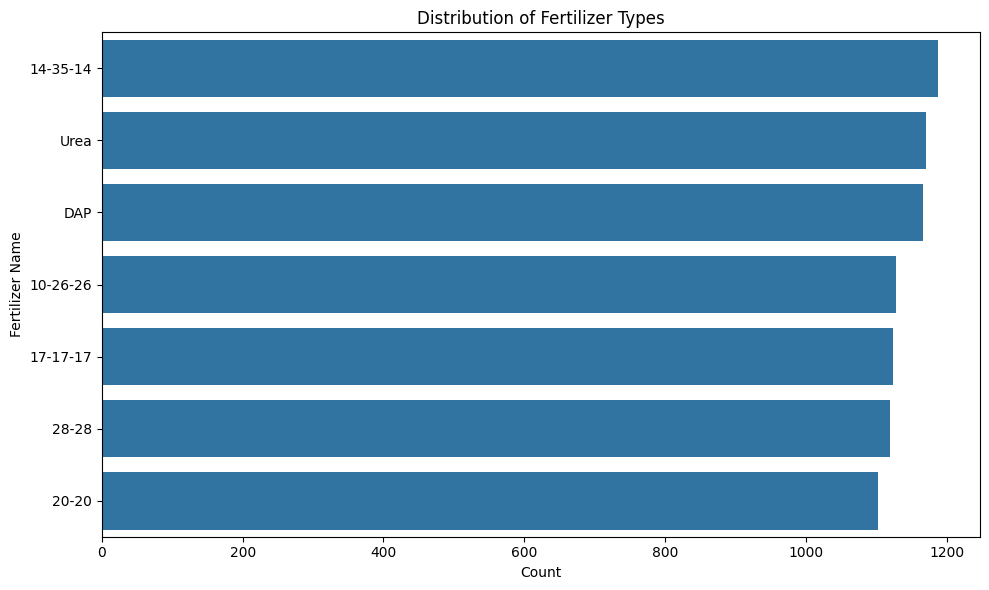

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize fertilizer distribution
plt.figure(figsize=(10, 6))
sns.countplot(y=df['Fertilizer Name'], order=df['Fertilizer Name'].value_counts().index)
plt.title('Distribution of Fertilizer Types')
plt.xlabel('Count')
plt.ylabel('Fertilizer Name')
plt.tight_layout()
plt.show()

In [10]:
# Prepare features and target
# For fertilizer prediction, we should include Crop Type as a feature
# But drop the target (Fertilizer Name)
X = df.drop(['Fertilizer Name'], axis=1)
y = df['Fertilizer Name']

In [11]:
# One-hot encode categorical features (Soil Type and Crop Type)
X = pd.get_dummies(X, columns=['Soil Type', 'Crop Type'], drop_first=False)

In [14]:
X.head()

,Temperature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Soil Type_Black,Soil Type_Clayey,Soil Type_Loamy,Soil Type_Red,...,Crop Type_Cotton,Crop Type_Ground Nuts,Crop Type_Maize,Crop Type_Millets,Crop Type_Oil seeds,Crop Type_Paddy,Crop Type_Pulses,Crop Type_Sugarcane,Crop Type_Tobacco,Crop Type_Wheat
0,26.0,52.0,38.0,37,0,0,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,29.0,52.0,45.0,12,0,36,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
2,34.0,65.0,62.0,7,9,30,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,32.0,62.0,34.0,22,0,20,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
4,28.0,54.0,46.0,35,0,0,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False


In [20]:
soil_columns = [col for col in X.columns if "Soil Type_" in col]
X[soil_columns] = X[soil_columns].astype(int)

In [18]:
crop_columns = [col for col in X.columns if "Crop Type_" in col]
X[crop_columns] = X[crop_columns].astype(int)

In [19]:
X.head()

,Temperature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Soil Type_Black,Soil Type_Clayey,Soil Type_Loamy,Soil Type_Red,...,Crop Type_Cotton,Crop Type_Ground Nuts,Crop Type_Maize,Crop Type_Millets,Crop Type_Oil seeds,Crop Type_Paddy,Crop Type_Pulses,Crop Type_Sugarcane,Crop Type_Tobacco,Crop Type_Wheat
0,26.0,52.0,38.0,37,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,29.0,52.0,45.0,12,0,36,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,34.0,65.0,62.0,7,9,30,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,32.0,62.0,34.0,22,0,20,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,28.0,54.0,46.0,35,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [12]:
from sklearn.preprocessing import LabelEncoder
# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print("\nEncoded fertilizer types:")
for i, fertilizer in enumerate(le.classes_):
    print(f"{i}: {fertilizer}")


Encoded fertilizer types:
0: 10-26-26
1: 14-35-14
2: 17-17-17
3: 20-20
4: 28-28
5: DAP
6: Urea


In [22]:
from sklearn.model_selection import train_test_split

# Split the data with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"\nTraining set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")


Training set shape: (6400, 22)
Test set shape: (1600, 22)


In [23]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
from imblearn.over_sampling import SMOTE

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print(f"\nOriginal training set shape: {X_train.shape}")
print(f"Resampled training set shape: {X_train_resampled.shape}")


Original training set shape: (6400, 22)
Resampled training set shape: (6650, 22)


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train_resampled, y_train_resampled)
y_pred_rf = rf_model.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"\nRandom Forest Accuracy: {rf_accuracy:.4f}")


Random Forest Accuracy: 0.1450


In [35]:
from sklearn.ensemble import GradientBoostingClassifier


# Train Gradient Boosting model
gb_model = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

gb_model.fit(X_train_resampled, y_train_resampled)
y_pred_gb = gb_model.predict(X_test_scaled)
gb_accuracy = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {gb_accuracy:.4f}")

Gradient Boosting Accuracy: 0.1444


In [36]:
from sklearn.metrics import classification_report

# Choose the better model
better_model = gb_model if gb_accuracy > rf_accuracy else rf_model
better_pred = y_pred_gb if gb_accuracy > rf_accuracy else y_pred_rf
better_name = "Gradient Boosting" if gb_accuracy > rf_accuracy else "Random Forest"

print(f"\nDetailed Classification Report for {better_name}:")
print(classification_report(y_test, better_pred, target_names=le.classes_))



Detailed Classification Report for Random Forest:
              precision    recall  f1-score   support

    10-26-26       0.14      0.13      0.14       226
    14-35-14       0.15      0.16      0.16       238
    17-17-17       0.10      0.10      0.10       225
       20-20       0.15      0.15      0.15       220
       28-28       0.18      0.19      0.18       224
         DAP       0.16      0.14      0.15       233
        Urea       0.14      0.14      0.14       234

    accuracy                           0.14      1600
   macro avg       0.15      0.14      0.14      1600
weighted avg       0.15      0.14      0.14      1600



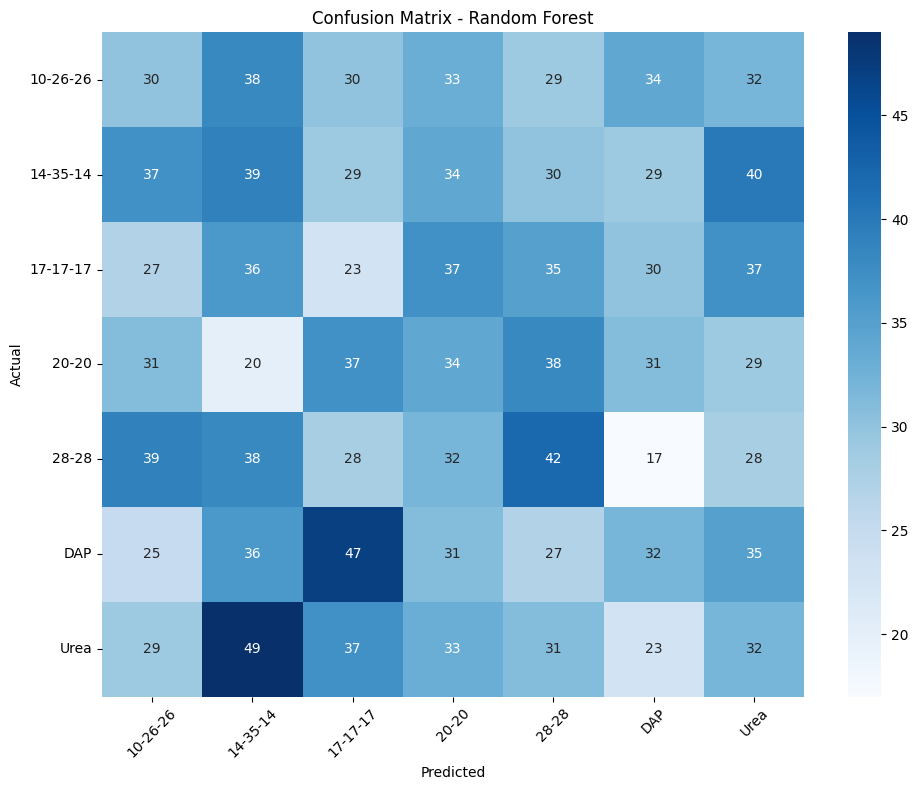

In [38]:
from sklearn.metrics import confusion_matrix

# Confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, better_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - {better_name}')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

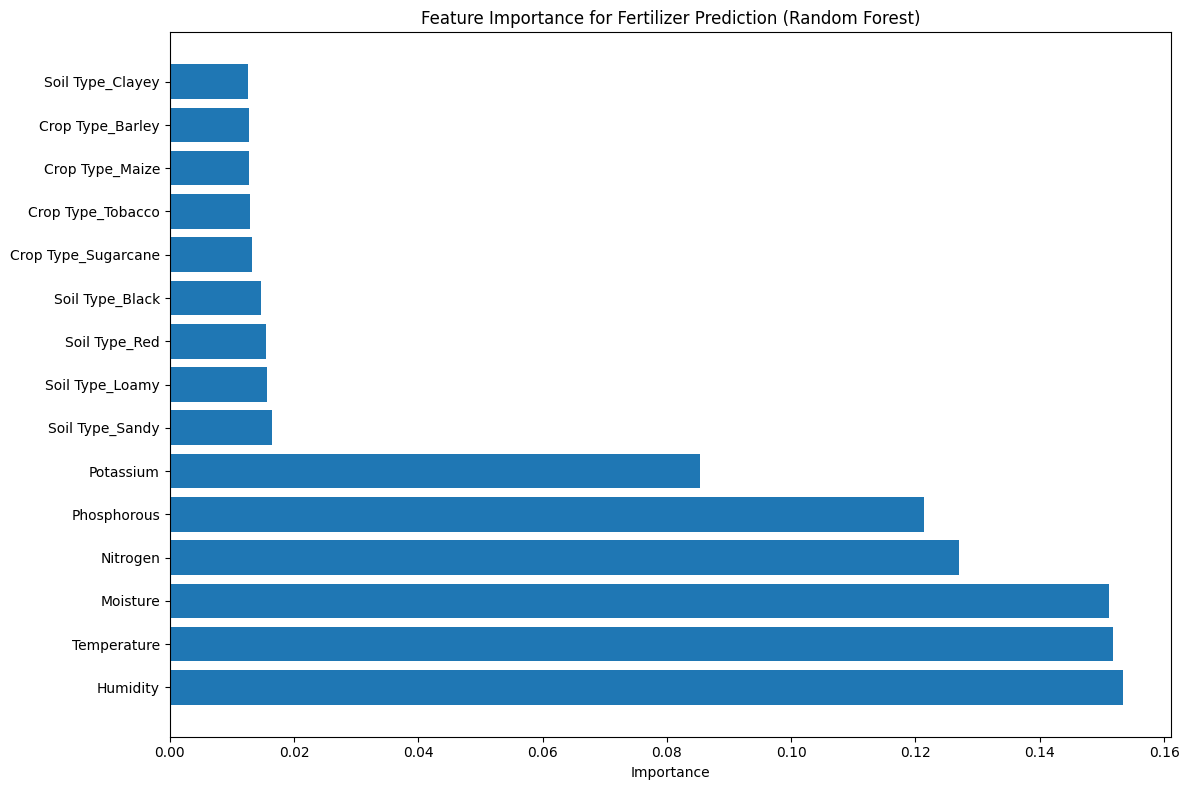

In [39]:
import numpy as np

# Feature importance analysis
feature_importance = better_model.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]
sorted_features = np.array(X.columns)[sorted_idx]

plt.figure(figsize=(12, 8))
plt.title(f'Feature Importance for Fertilizer Prediction ({better_name})')
plt.barh(range(15), feature_importance[sorted_idx[:15]], align='center')
plt.yticks(range(15), sorted_features[:15])
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

In [40]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning with cross-validation
if better_name == "Random Forest":
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    }
    model_to_tune = RandomForestClassifier(class_weight='balanced', random_state=42)
else:
    param_grid = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.05, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }
    model_to_tune = GradientBoostingClassifier(random_state=42)

print(f"\nPerforming hyperparameter tuning for {better_name}...")
grid_search = GridSearchCV(
    model_to_tune, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1
)
grid_search.fit(X_train_resampled, y_train_resampled)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")



Performing hyperparameter tuning for Random Forest...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best cross-validation score: 0.1877


In [41]:
# Test the best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)
best_accuracy = accuracy_score(y_test, y_pred_best)
print(f"\nBest {better_name} Model Accuracy: {best_accuracy:.4f}")



Best Random Forest Model Accuracy: 0.1487


In [42]:
# Final classification report with the best model
print("\nFinal Classification Report with the Best Model:")
print(classification_report(y_test, y_pred_best, target_names=le.classes_))



Final Classification Report with the Best Model:
              precision    recall  f1-score   support

    10-26-26       0.17      0.16      0.17       226
    14-35-14       0.14      0.14      0.14       238
    17-17-17       0.10      0.10      0.10       225
       20-20       0.15      0.16      0.16       220
       28-28       0.18      0.19      0.19       224
         DAP       0.16      0.16      0.16       233
        Urea       0.13      0.13      0.13       234

    accuracy                           0.15      1600
   macro avg       0.15      0.15      0.15      1600
weighted avg       0.15      0.15      0.15      1600



In [43]:
# Feature engineering: Create more domain-specific features
X_engineered = X.copy()

In [44]:
# For numerical columns
numeric_cols = ['Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous']

# Create NPK ratio features
X_engineered['N_P_ratio'] = df['Nitrogen'] / (df['Phosphorous'] + 0.1) 
X_engineered['N_K_ratio'] = df['Nitrogen'] / (df['Potassium'] + 0.1)
X_engineered['P_K_ratio'] = df['Phosphorous'] / (df['Potassium'] + 0.1)
X_engineered['NPK_sum'] = df['Nitrogen'] + df['Phosphorous'] + df['Potassium']
X_engineered['NK_product'] = df['Nitrogen'] * df['Potassium']
X_engineered['NP_product'] = df['Nitrogen'] * df['Phosphorous']

In [45]:
# Train-test split with the engineered features
X_train_eng, X_test_eng, y_train_eng, y_test_eng = train_test_split(
    X_engineered, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

In [46]:
# Scale the features
scaler_eng = StandardScaler()
X_train_eng_scaled = scaler_eng.fit_transform(X_train_eng)
X_test_eng_scaled = scaler_eng.transform(X_test_eng)

In [47]:
# Apply SMOTE
X_train_eng_resampled, y_train_eng_resampled = smote.fit_resample(X_train_eng_scaled, y_train_eng)

In [48]:

# Train model with engineered features
best_model_eng = RandomForestClassifier(
    **grid_search.best_params_,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
) if better_name == "Random Forest" else GradientBoostingClassifier(
    **grid_search.best_params_,
    random_state=42
)

In [49]:
best_model_eng.fit(X_train_eng_resampled, y_train_eng_resampled)
y_pred_eng = best_model_eng.predict(X_test_eng_scaled)
eng_accuracy = accuracy_score(y_test_eng, y_pred_eng)
print(f"\nModel with Feature Engineering Accuracy: {eng_accuracy:.4f}")


Model with Feature Engineering Accuracy: 0.1475


So as we can see, when trying to predict fertilizer, we get accuracy of 14% which is pretty low. Therefore we can assume that there is a  problem with dataset. 

Why This Is Happening
1. Feature Overlap Between Crops: Multiple crops can grow successfully in very similar soil conditions - your data confirms this. The boxplots and feature importance show high overlap in soil parameters across different crops.

2. Missing Critical Information: Many crucial factors that determine crop selection are missing from your dataset:

 - Growing season/seasonality
 - Historical cropping patterns
 - Economic factors (crop prices, market demand)
 - Farmer preferences
 - Regional agricultural practices
 - Water availability beyond just moisture

 3. Missing Interaction Effects: Crops often depend on complex interactions between climate, soil, and management practices that simple feature engineering can't capture.

So, let's try a different dataset with crop and soil data.